# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
#Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [39]:
#URL for web scrapping as provided in the task
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
#Take an integer input from user for the number of pages they want to look at
pages = int(input("Enter the number of pages you want to look into: "))
# pages = 10  (an example)
page_size = 100

Enter the number of pages you want to look into: 300


In [40]:
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

   ---> 3740 total reviews
Scraping page 187
   ---> 3740 total reviews
Scraping page 188
   ---> 3740 total reviews
Scraping page 189
   ---> 3740 total reviews
Scraping page 190
   ---> 3740 total reviews
Scraping page 191
   ---> 3740 total reviews
Scraping page 192
   ---> 3740 total reviews
Scraping page 193
   ---> 3740 total reviews
Scraping page 194
   ---> 3740 total reviews
Scraping page 195
   ---> 3740 total reviews
Scraping page 196
   ---> 3740 total reviews
Scraping page 197
   ---> 3740 total reviews
Scraping page 198
   ---> 3740 total reviews
Scraping page 199
   ---> 3740 total reviews
Scraping page 200
   ---> 3740 total reviews
Scraping page 201
   ---> 3740 total reviews
Scraping page 202
   ---> 3740 total reviews
Scraping page 203
   ---> 3740 total reviews
Scraping page 204
   ---> 3740 total reviews
Scraping page 205
   ---> 3740 total reviews
Scraping page 206
   ---> 3740 total reviews
Scraping page 207
   ---> 3740 total reviews
Scraping page 208
   ---> 37

In [41]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Worst service ever. Lost bag...
1,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
2,✅ Trip Verified | Not a great experience. I co...
3,Not Verified | I was excited to fly BA as I'd ...
4,Not Verified | I just want to warn everyone o...


In [42]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [43]:
 df

,reviews
0,✅ Trip Verified | Worst service ever. Lost bag...
1,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
2,✅ Trip Verified | Not a great experience. I co...
3,Not Verified | I was excited to fly BA as I'd ...
4,Not Verified | I just want to warn everyone o...
...,...
3735,Flew LHR - VIE return operated by bmi but BA a...
3736,LHR to HAM. Purser addresses all club passenge...
3737,My son who had worked for British Airways urge...
3738,London City-New York JFK via Shannon on A318 b...


In [44]:
df.reviews = df.reviews.str.split('|', expand=True)[1]

In [45]:
df

,reviews
0,Worst service ever. Lost baggage because of d...
1,BA 246 21JAN 2023 Did not appreciate the unp...
2,Not a great experience. I could not check in ...
3,I was excited to fly BA as I'd not travelled ...
4,I just want to warn everyone of the worst cu...
...,...
3735,None
3736,None
3737,None
3738,None




### Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

### Data preprocessing steps:

1. Cleaning the text
2. Tokenization
3. Enrichment – POS tagging
4. Stopwords removal
5. Obtaining the stem words

## Step 1 - Cleanning the text

In [46]:
import re

In [47]:
# Define a function to clean the text
def clean(text):
# Remove all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

In [48]:
# Clean the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...
1,BA 246 21JAN 2023 Did not appreciate the unp...,BA JAN Did not appreciate the unprofessional ...
2,Not a great experience. I could not check in ...,Not a great experience I could not check in o...
3,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...
4,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...


## Step 2 - Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

## Step 3 - Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

## Step 4 - Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

## Step 5 - Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.
The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [49]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v..."
1,BA 246 21JAN 2023 Did not appreciate the unp...,BA JAN Did not appreciate the unprofessional ...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes..."
2,Not a great experience. I could not check in ...,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (..."
3,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ..."
4,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...,"[(want, v), (warn, v), (everyone, n), (worst, ..."


In [52]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v...",Worst service ever Lost baggage delayed flig...
1,BA 246 21JAN 2023 Did not appreciate the unp...,BA JAN Did not appreciate the unprofessional ...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes...",BA JAN appreciate unprofessional attitude pi...
2,Not a great experience. I could not check in ...,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (...",great experience could check online two sepa...
3,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ...",excite fly BA travel long haul yr travel Aus...
4,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...,"[(want, v), (warn, v), (everyone, n), (worst, ...",want warn everyone bad customer service expe...


In [53]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage delayed flig...
1,BA 246 21JAN 2023 Did not appreciate the unp...,BA JAN appreciate unprofessional attitude pi...
2,Not a great experience. I could not check in ...,great experience could check online two sepa...
3,I was excited to fly BA as I'd not travelled ...,excite fly BA travel long haul yr travel Aus...
4,I just want to warn everyone of the worst cu...,want warn everyone bad customer service expe...
...,...,...
3735,None,None
3736,None,None
3737,None,None
3738,None,None


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [54]:
!pip install vaderSentiment

In [55]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [56]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [57]:
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [58]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [59]:
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v...",Worst service ever Lost baggage delayed flig...,-0.9001,Negative
1,BA 246 21JAN 2023 Did not appreciate the unp...,BA JAN Did not appreciate the unprofessional ...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes...",BA JAN appreciate unprofessional attitude pi...,0.2960,Neutral
2,Not a great experience. I could not check in ...,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (...",great experience could check online two sepa...,0.9538,Positive
3,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ...",excite fly BA travel long haul yr travel Aus...,0.7506,Positive
4,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...,"[(want, v), (warn, v), (everyone, n), (worst, ...",want warn everyone bad customer service expe...,0.6318,Positive


In [60]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Neutral     1770
Positive    1137
Negative     833
Name: Analysis, dtype: int64

# Visual Representation

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x1a3bdcb6500>,
 [Text(0.0922911271435859, 1.0961215023210549, 'Neutral'),
  Text(-0.7765095989137449, -0.7791231242844837, 'Positive'),
  Text(1.032781859559683, -0.8694030311451897, 'Negative')],
 [Text(0.0503406148055923, 0.5978844558114844, '47.3%'),
  Text(-0.42355069031658815, -0.42497624960971836, '30.4%'),
  Text(0.6502700597227633, -0.5474019084988231, '22.3%')])

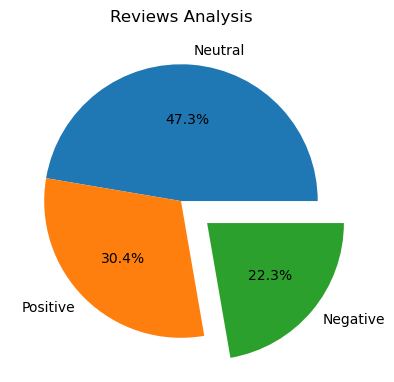

In [62]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [27]:
df.to_csv("BA_reviews.csv")

# Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [29]:
!pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 1.7 MB/s eta 0:00:00


In [30]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

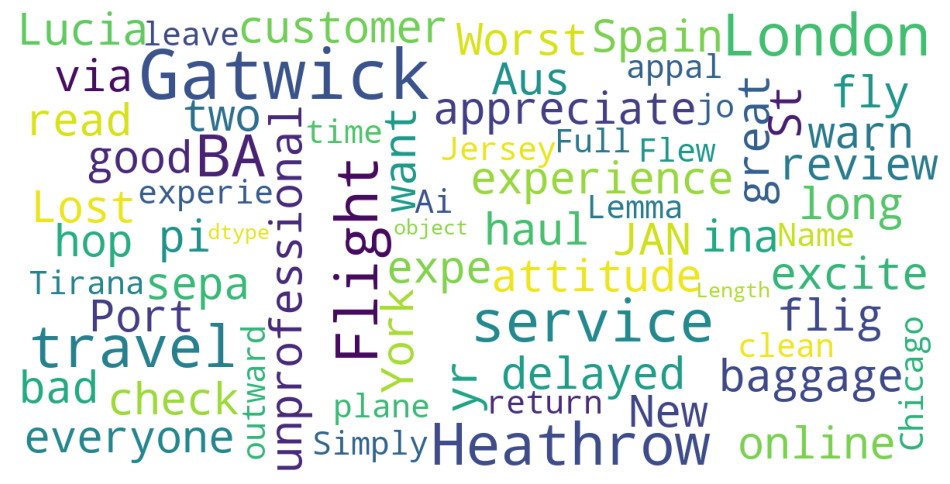

In [31]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

## Distribution of Review Lengths:
Visualizing the distribution of review lengths can provide insights into the length patterns of the reviews.

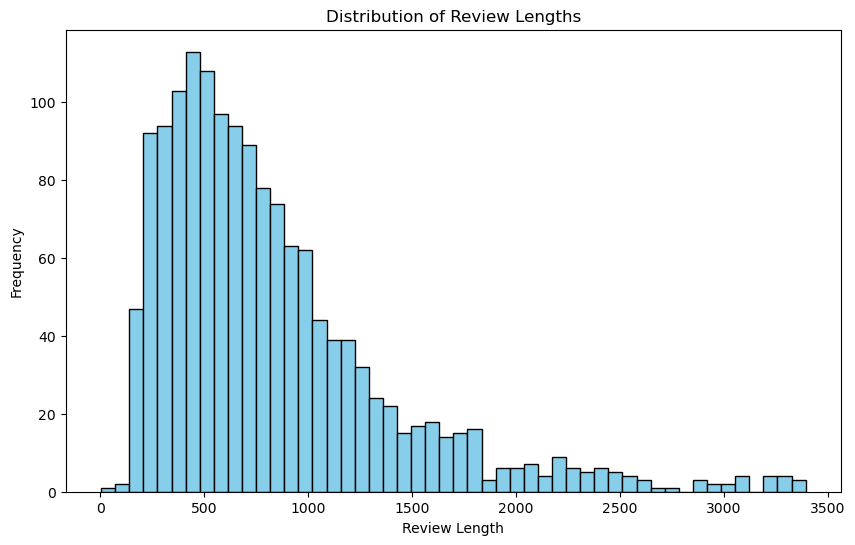

In [32]:
# Distribution of review lengths
df['Review Length'] = df['Cleaned Reviews'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['Review Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

## Sentiment Distribution Over Pages:
You can visualize how the sentiment varies across different pages of reviews.

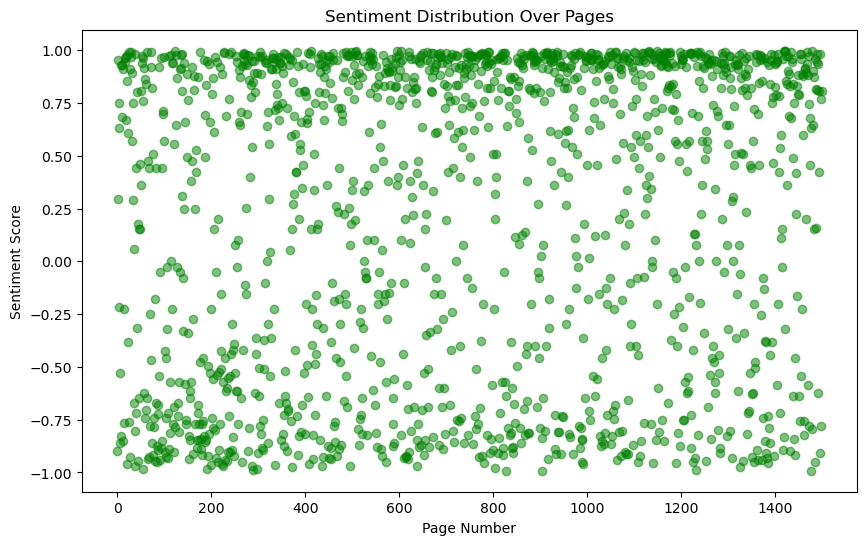

In [33]:
# Sentiment distribution over pages
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Sentiment'], color='green', alpha=0.5)
plt.title('Sentiment Distribution Over Pages')
plt.xlabel('Page Number')
plt.ylabel('Sentiment Score')
plt.show()

## Most Frequent Words:
Visualizing the most frequent words in the reviews can provide insights into the common themes.

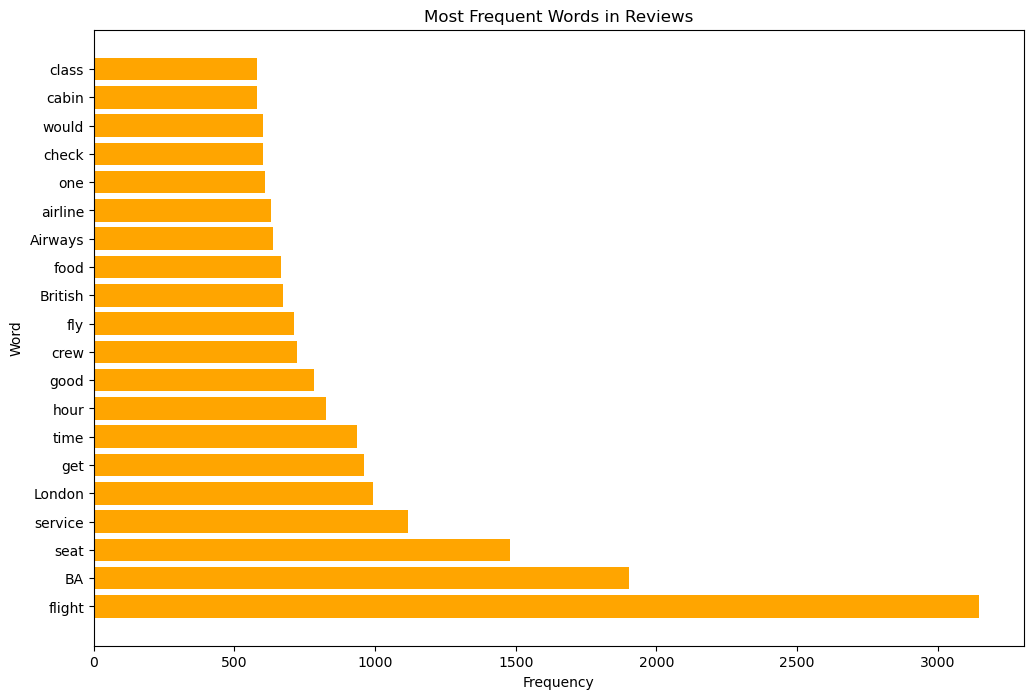

In [34]:
# Most frequent words
from collections import Counter

word_counts = Counter(" ".join(df['Lemma']).split()).most_common(20)
word_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
plt.barh(word_df['Word'], word_df['Frequency'], color='orange')
plt.title('Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## Positive vs. Negative Reviews Count:
A bar chart comparing the count of positive and negative reviews.

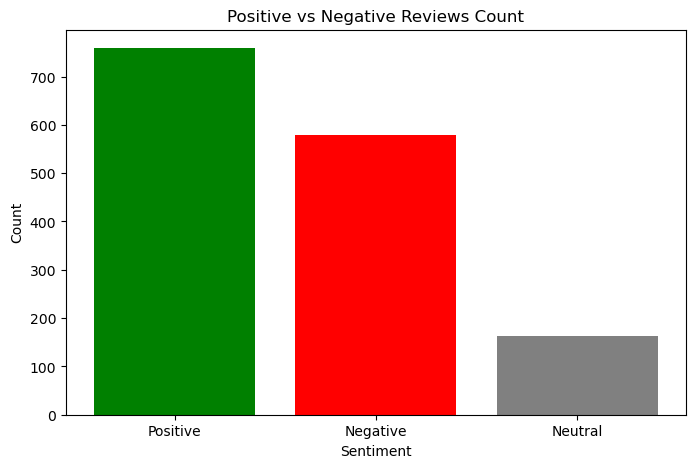

In [35]:
# Positive vs Negative Reviews Count
sentiment_counts = df['Analysis'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'grey'])
plt.title('Positive vs Negative Reviews Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Word Frequency in Positive and Negative Reviews:
Visualize the most frequent words in positive and negative reviews separately.

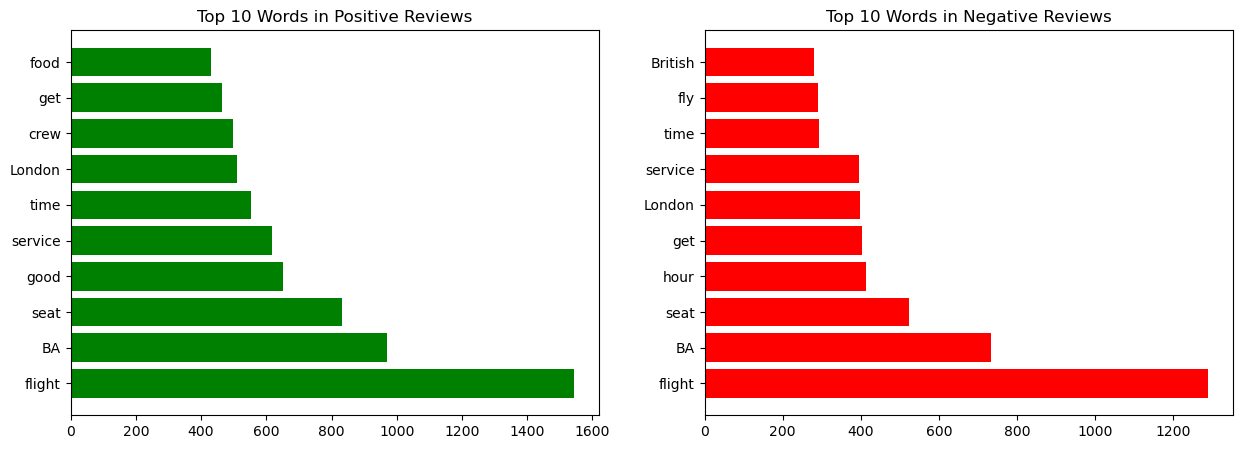

In [37]:
# Word frequency in positive and negative reviews
positive_reviews = df[df['Analysis'] == 'Positive']['Lemma']
negative_reviews = df[df['Analysis'] == 'Negative']['Lemma']

positive_word_counts = Counter(" ".join(positive_reviews).split()).most_common(10)
negative_word_counts = Counter(" ".join(negative_reviews).split()).most_common(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Positive reviews word frequency
axes[0].barh([word[0] for word in positive_word_counts], [word[1] for word in positive_word_counts], color='green')
axes[0].set_title('Top 10 Words in Positive Reviews')

# Negative reviews word frequency
axes[1].barh([word[0] for word in negative_word_counts], [word[1] for word in negative_word_counts], color='red')
axes[1].set_title('Top 10 Words in Negative Reviews')

plt.show()
